<a href="https://colab.research.google.com/github/Kalaikujji/kalai/blob/main/car_data_eda_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/CarsData.csv')

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [6]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall
97711,Grandland X,2019,15798,Manual,10586,Diesel,150,48.7,1.5,vauxhall


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [10]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (97712, 10)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
model,object,0,0.0,0,196,97712,NaN,NaN,NaN,NaN,I10,Polo,2 Series
year,int64,0,0.0,0,27,97712,1970.0,2024.0,2017.066502,2.118661,2017,2017,2019
price,int64,0,0.0,0,13236,97712,450.0,159999.0,16773.487555,9868.552222,7495,10989,27990
transmission,object,0,0.0,0,4,97712,NaN,NaN,NaN,NaN,Manual,Manual,Semi-Auto
mileage,int64,0,0.0,0,42214,97712,1.0,323000.0,23219.475499,21060.882301,11630,9200,1614
fuelType,object,0,0.0,0,5,97712,NaN,NaN,NaN,NaN,Petrol,Petrol,Diesel
tax,int64,0,0.0,0,48,97712,0.0,580.0,120.142408,63.35725,145,145,145
mpg,float64,0,0.0,0,208,97712,0.3,470.8,55.205623,16.181659,60.1,58.9,49.6
engineSize,float64,0,0.0,0,40,97712,0.0,6.6,1.664913,0.558574,1.0,1.0,2.0
Manufacturer,object,0,0.0,0,9,97712,NaN,NaN,NaN,NaN,hyundi,volkswagen,BMW


In [11]:
# Check row and column numbers

rows = df.shape[0]
cols = df.shape[1]
print("Rows   : " + str(rows))
print("Columns: " + str(cols))

Rows   : 97712
Columns: 10


In [12]:
df['Manufacturer'].unique()

array(['hyundi', 'volkswagen', 'BMW', 'skoda', 'ford', 'toyota', 'merc',
       'vauxhall', 'Audi'], dtype=object)

In [14]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [16]:
df['model'].unique()

array([' I10', ' Polo', ' 2 Series', ' Yeti Outdoor', ' Fiesta', ' C-HR',
       ' Kuga', ' Tiguan', ' A Class', ' 1 Series', ' Up', ' Golf',
       ' Corsa', ' RAV4', ' GLA Class', ' Aygo', ' Q5', ' Karoq',
       ' Scala', ' Auris', ' Tucson', ' A4', ' Viva', ' Kodiaq',
       ' C Class', ' Mondeo', ' Citigo', ' Yaris', ' X4', ' Octavia',
       ' Astra', ' Focus', ' 3 Series', ' GLC Class', ' Q3', ' B-MAX',
       ' C-MAX', ' IX20', ' X5', ' T-Cross', ' Shuttle', ' Insignia',
       ' Zafira', ' A3', ' A5', ' SL CLASS', ' EcoSport', ' X1', ' Fabia',
       ' Golf SV', ' Verso', ' Yeti', ' Mokka X', ' Antara', ' E Class',
       ' 4 Series', ' Superb', ' 5 Series', ' 8 Series', ' B Class',
       ' Ka+', ' X2', ' GLE Class', ' A6', ' Mokka', ' Passat', ' Kamiq',
       ' Adam', ' Q7', ' Tiguan Allspace', ' X3', ' A1', ' Grandland X',
       ' Meriva', ' Tourneo Connect', ' Arteon', ' TT', ' GLS Class',
       ' Santa Fe', ' I30', ' S Class', ' Ioniq', ' Edge', ' S-MAX',
       ' SLK'

In [17]:
cols = ['price',
        'mileage',
        'tax',
        'mpg',
        'engineSize']

In [20]:
df[cols] = df[cols].astype(float)


In [21]:
# Categorical variables:
cat_cols = df.select_dtypes(include = ['object', 'category']).columns.to_list()

# Numerical variables:
num_cols = df.select_dtypes(include = ['float', 'int']).columns.to_list()

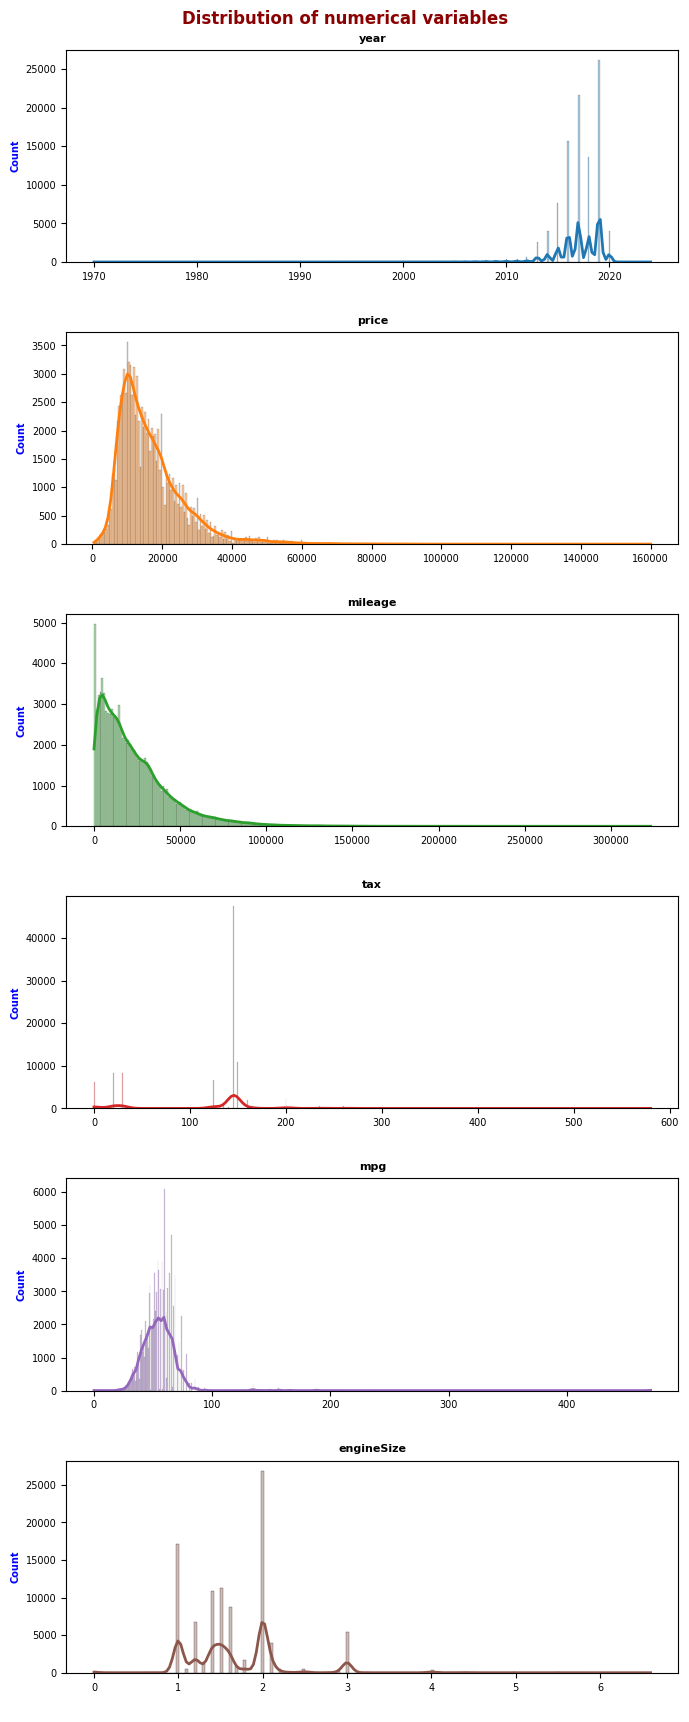

In [22]:
# Numerical variables:

fig,axes = plt.subplots(7, 1, figsize = (7, 20))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'blue')
  axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
  axes[i].tick_params(labelsize = 7)


fig.delaxes(axes[6])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()


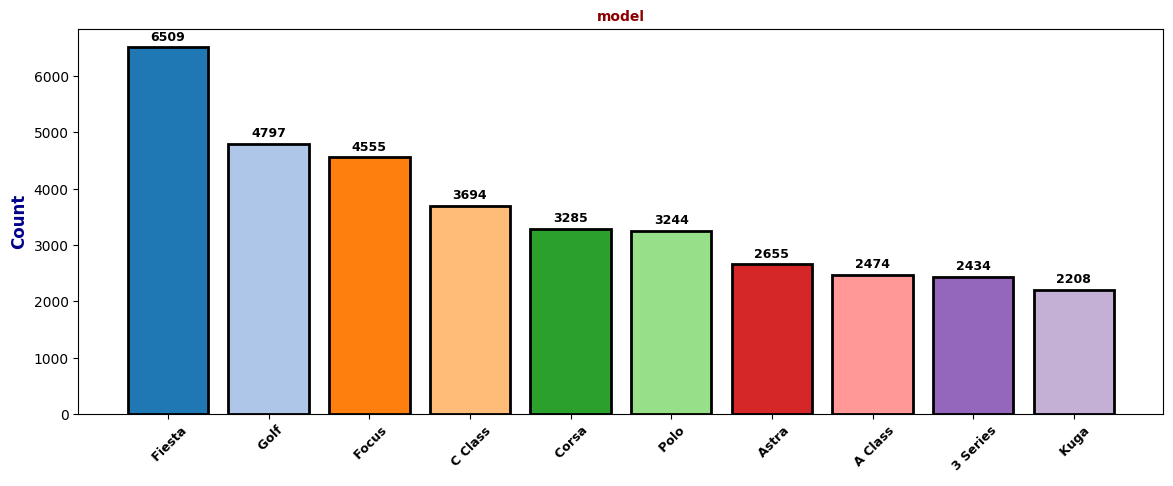

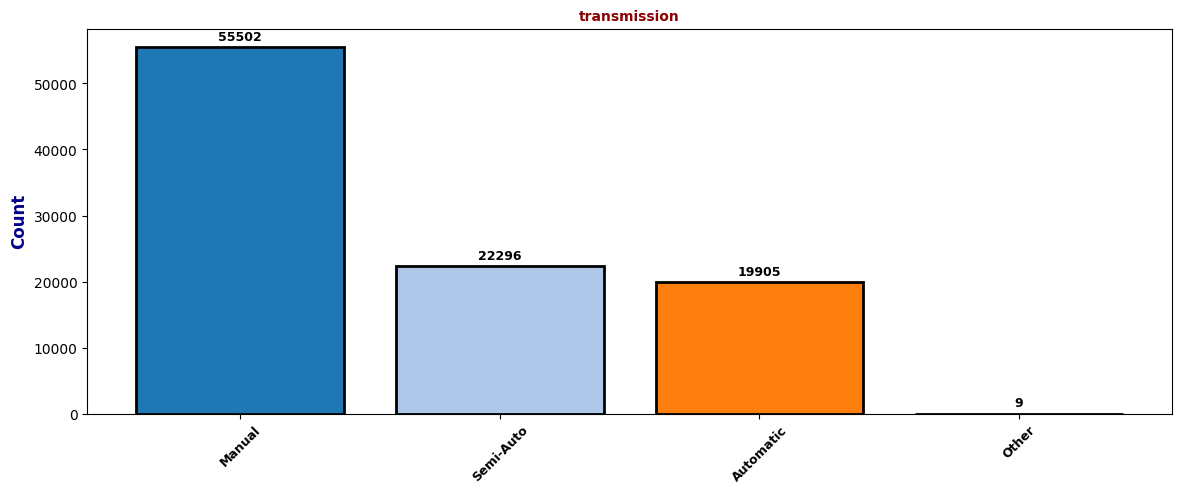

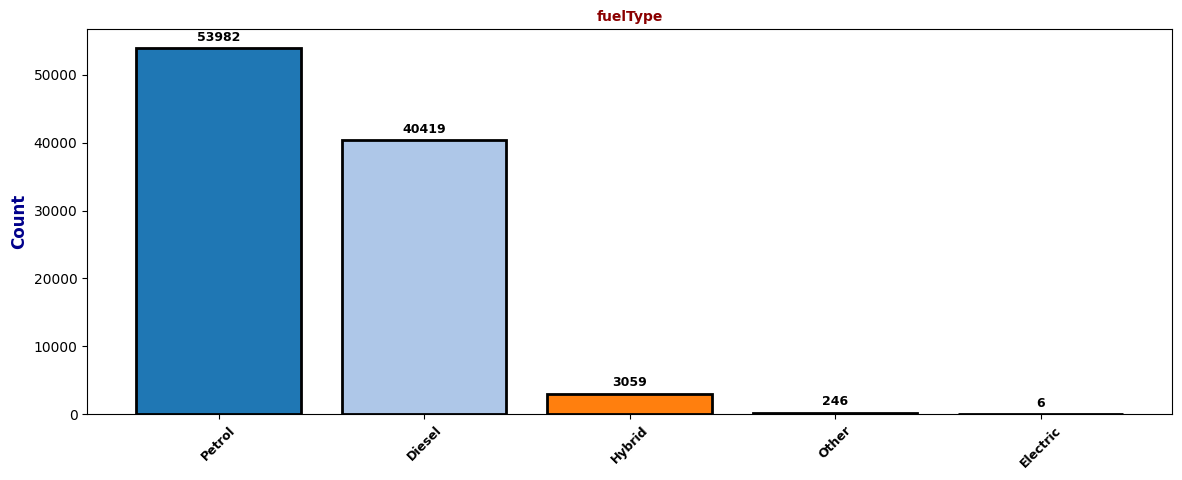

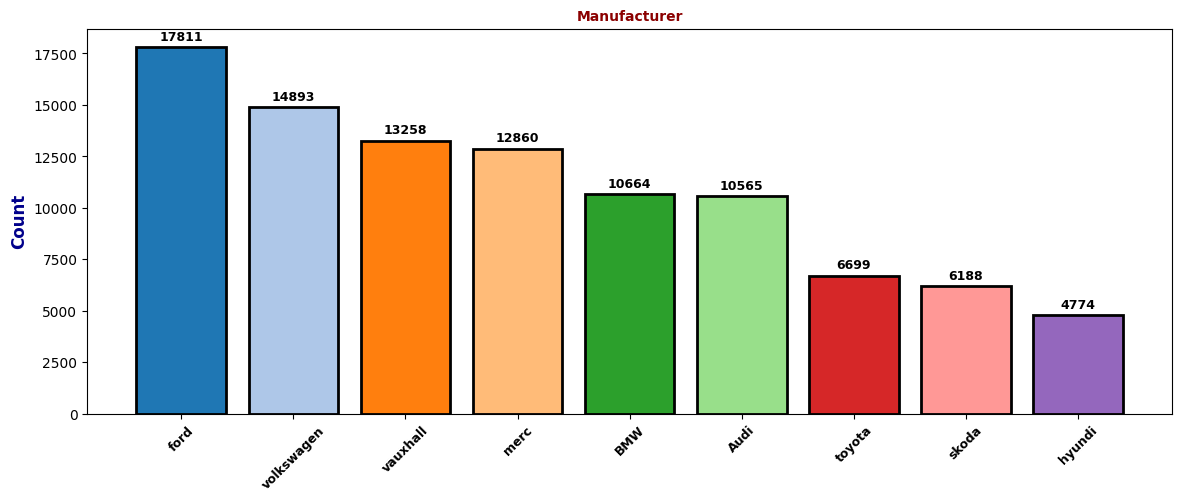

In [24]:
# Top for Categorical variables

cols = [0, 1, 2, 3]

for i in cols:

        if i == 0:

            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[0]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[0]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()

        else:

            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[i]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[i]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()

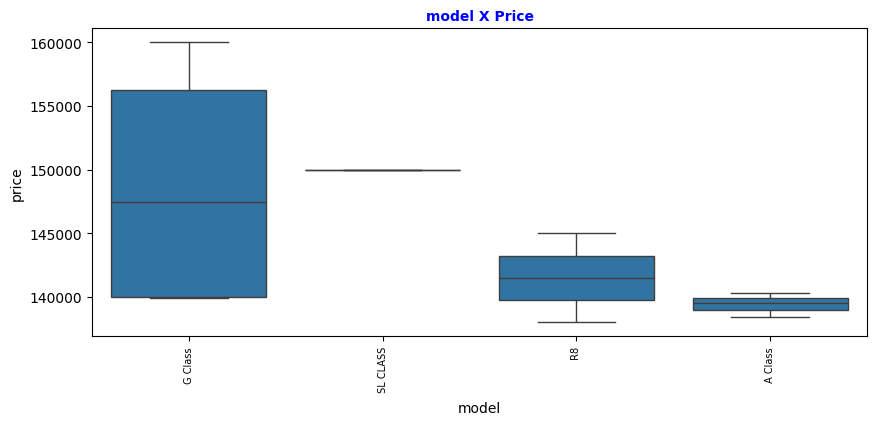

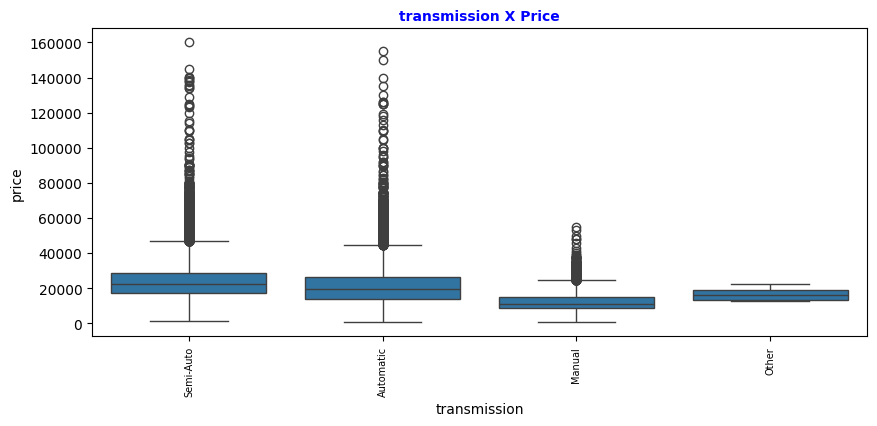

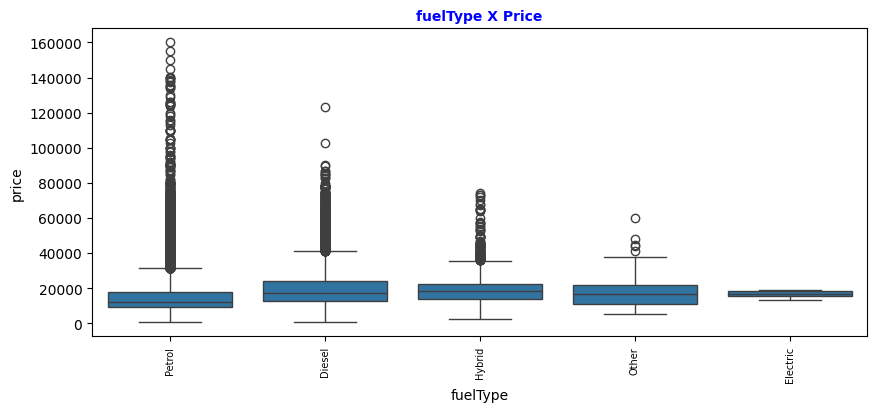

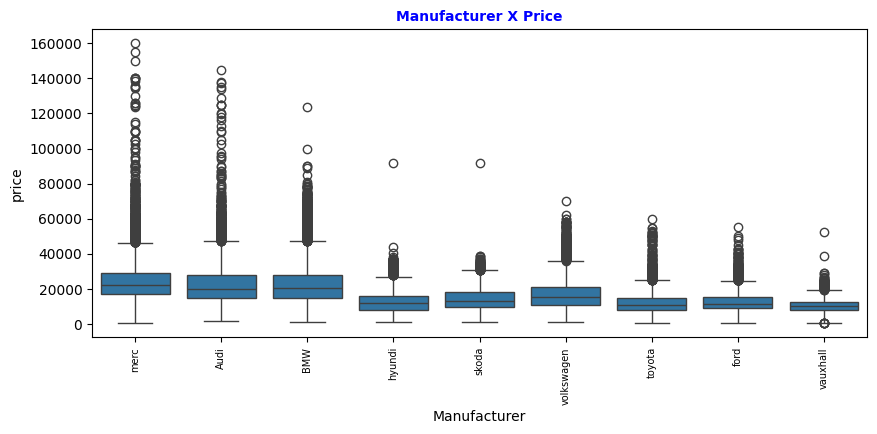

In [25]:
cols = [0, 1, 2, 3]

df_top = df.sort_values(["price"], axis=0, ascending=False)

for i in cols:
        fig, ax = plt.subplots(figsize=(10, 4))

        if i == 0:
                sns.boxplot(x = 'model', y = 'price', data = df_top.head(10))
                ax.set_title(f"{cat_cols[i]}" + " X Price", fontsize = 10, fontweight = 'bold', color = 'blue')
                plt.xticks(rotation=90, fontsize = 7)
                plt.show()

        else:
                sns.boxplot(x = cat_cols[i], y = 'price', data = df_top)
                ax.set_title(f"{cat_cols[i]}"+ " X Price", fontsize = 10, fontweight = 'bold', color = 'blue')
                plt.xticks(rotation=90, fontsize = 7)
                plt.show()

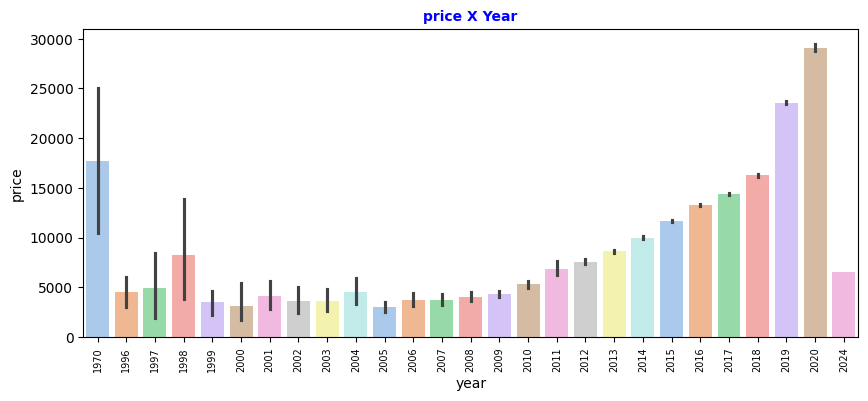

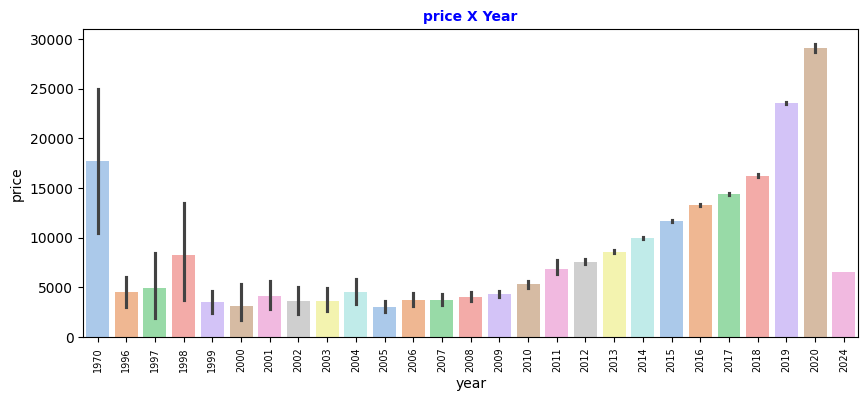

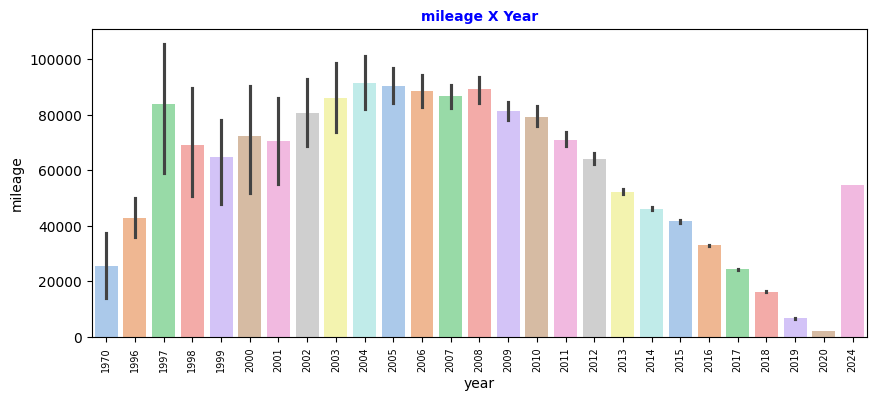

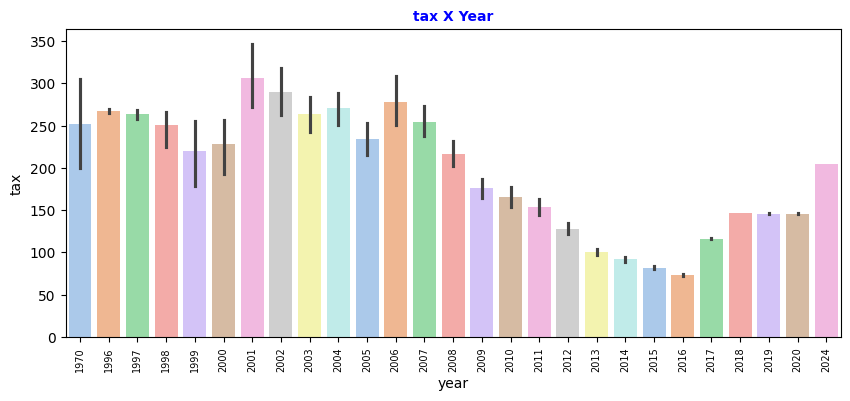

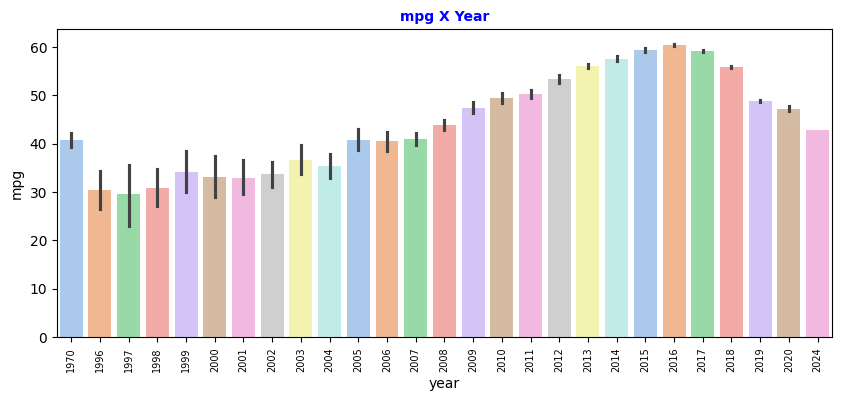

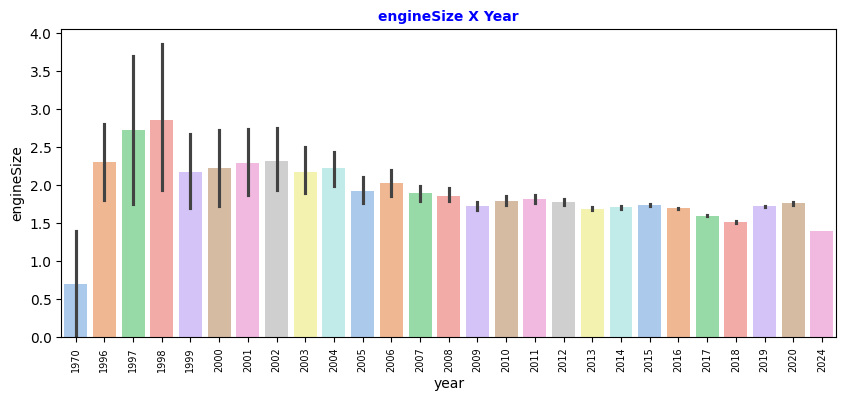

In [26]:
for i in num_cols:
        fig, ax = plt.subplots(figsize=(10, 4))

        if i == 'year':
            sns.barplot(data=df, x = 'year', y = 'price', palette="pastel")
            ax.set_title('price'  + " X Year", fontsize = 10, fontweight = 'bold', color = 'blue')
            plt.xticks(rotation=90, fontsize = 7)
            plt.show()
        else:
            sns.barplot(data=df, x = 'year', y = i, palette="pastel")
            ax.set_title(f"{i}"+ " X Year", fontsize = 10, fontweight = 'bold', color = 'blue')
            plt.xticks(rotation=90, fontsize = 7)
            plt.show()

In [34]:
# Top 10 models according to average price.

char_bar = df.groupby(['model'])[['price']].mean().reset_index()
char_bar = char_bar.sort_values(by=("price"), ascending=False)

top = char_bar.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top['model'], y=top["price"]))

fig.update_layout(title='Top 10 models according to average price.',
                          xaxis_title='model',
                          yaxis_title= "price",
                          plot_bgcolor= 'blue',
                          paper_bgcolor='yellow',
                          font=dict(color='red'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)
plt.show()

In [29]:
# Let's create a dataframe just for the Fiesta Model
df_fiesta = df[df['model'] == ' Fiesta']
df_fiesta.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
4,Fiesta,2017,7999.0,Manual,19353.0,Petrol,125.0,54.3,1.2,ford
8,Fiesta,2018,9891.0,Manual,31639.0,Petrol,145.0,65.7,1.0,ford
16,Fiesta,2017,10490.0,Manual,16087.0,Petrol,0.0,65.7,1.0,ford
21,Fiesta,2017,12750.0,Semi-Auto,12687.0,Petrol,145.0,54.3,1.0,ford
30,Fiesta,2018,10500.0,Manual,13427.0,Petrol,145.0,65.7,1.0,ford


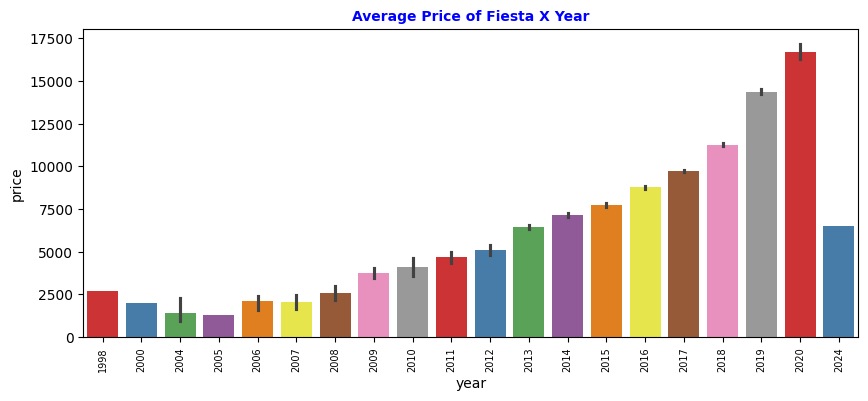

In [32]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=df_fiesta, x = 'year', y = 'price', palette="Set1")
ax.set_title('Average Price of Fiesta X Year', fontsize = 10, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 7)
plt.show()